In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft 
from scipy.signal import medfilt as mediann
from librosa import stft, istft
from test.plotting import basic_plot, basic_plot_comparison 
from hps import hps
from test.signals import  harmonic, impulses 


## HPS: Separacion Armonica y Percusiva.
Este algoritmo busca seraparar las componetes armonicas y percusivas de una señal de audio, con el objetivo de implementar un TSM hibrido que procesa cada una de estas componentes por serapado,  el OLA y PV  aprovechando las mejores cualidades de cada uno.

La entrada de este algoritmo es la señal de audio con su correspondiente $F_s$, luego tenemos los parametros quen permite modificar son: 

-$N$: El largo de la STFT tiene una gran ifluencia en el desempeño del algoritmo existe una relacion de compromiso entre resolucion en frecuencia y tiempo. Cuanto mayor sea este valor mejora en frecuencia y pasa lo contrario en tiempo. 

-$M$: El largo de la ventana del fitro de mediana. A mayores valores aumenta el suavisado que genera. 

TERMINAR

A continuacion se detallan las pruebas de este algoritmo las cuales las dividimos en dos partes. Primero se muestran las objetivas, en las cules se busca medir los resultados con señales generadas digitalmente. Luego realizamos estas tipo de pruebas en contexto de TSM.
Y finalmente buscaremos evaluar al algoritmo de forma subjetiva con señales musicales para realizar un TSM. 

# Puebas Objetivas.

Primero generamos la señal de prueba $x[n]_e$ que sera la suma de otras señales puramente armonicas $x[n]_a$ y percusivas $x[n]$. En teoria si el aglgoritmo fuese perfecto, si ingresamos $x[n]_e$ deberia devolvernos a la salida $x[n]_a$ y $x[n]_p$ por lo tanto estas señales seran utiles para compararlas con la salida y medir eficacia del metodo. 

 

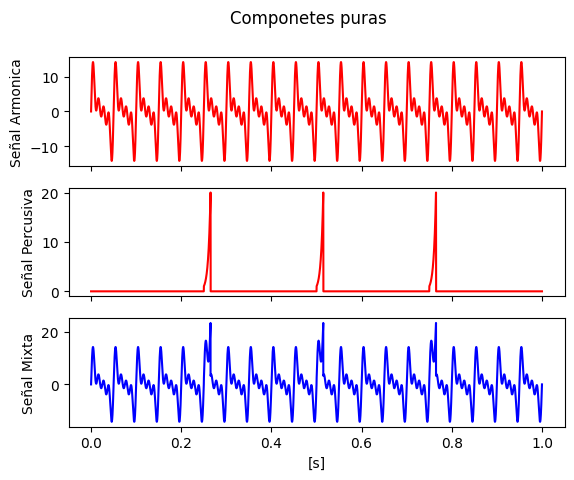

In [8]:
fs = 44100
D = 1 #Duracion en segundos
x_h = harmonic(4, 20,fs,5) #Por defecto la duracion es de 1s
x_p = impulses(3,44100,20, 15) # Tres impulsos de 30ms
x = x_p + x_h
t = np.linspace(0,D,fs*D)

#Graficamos cada señal
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.plot(t, x_h, c='red')
ax2.plot(t, x_p, c='red')
ax3.plot(t, x, c = 'blue')
 
ax1.set_ylabel('Señal Armonica')
ax2.set_ylabel('Señal Percusiva')
ax3.set_ylabel('Señal Mixta')
ax3.set_xlabel('[s]')

fig.suptitle('Componetes puras')
plt.show()


Aplicamos la separacion a la señal mixta, y graficamos los resultados.

Text(0.5, 0, '[s]')

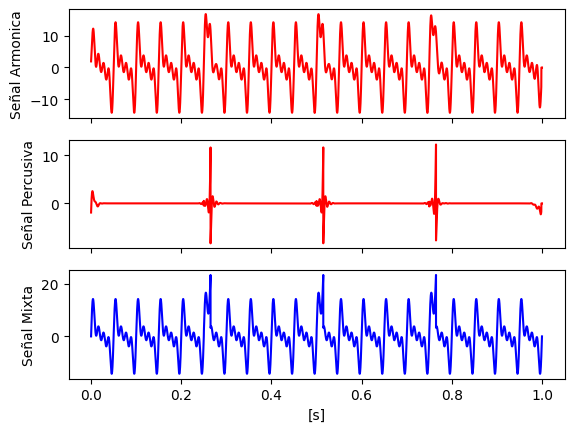

In [10]:

N = 2**11
M = 23

y_p ,y_h = hps(x,N,M)

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.plot(t, y_h, c='red')
ax2.plot(t, y_p, c='red')
ax3.plot(t, x, c='blue')
 
ax1.set_ylabel('Señal Armonica')
ax2.set_ylabel('Señal Percusiva')
ax3.set_ylabel('Señal Mixta')
ax3.set_xlabel('[s]')


Para evaluar la efectividad medimos la similitud de las señales de entrada y salida utilizando la funcion